In [1]:
#Anthony
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
GDP_growth_df = pd.read_csv('merged.csv')

In [3]:
GDP_growth_df.head(10)

,Unnamed: 0,country,ISO,year,population,GDP,inflation,unemployment,GDP_change,ConfirmedCases,ConfirmedDeaths,CasesPer1k,DeathsPer1k,PopulationVaccinated,StringencyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex
0,2,Afghanistan,AFG,2020,38972230.0,2.014344e+10,NaN,11.71,5.356581e+09,52330.0,2189.0,1.320850,0.055252,0.00,50.400873,41.275527,46.769891,2.818182
1,3,Afghanistan,AFG,2021,40099462.0,1.478686e+10,NaN,5.58,NaN,158084.0,7356.0,3.895567,0.181269,9.13,29.242219,24.306740,27.781370,0.000000
2,4,Albania,ALB,2018,2866376.0,1.515643e+10,2.028060,12.30,-2.453984e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,Albania,ALB,2019,2854191.0,1.540183e+10,1.411091,11.47,2.699645e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,Argentina,ARG,2018,44494502.0,5.248197e+11,NaN,9.22,7.706513e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,29,Argentina,ARG,2019,44938712.0,4.477546e+11,NaN,9.84,6.221438e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30,Argentina,ARG,2020,45376763.0,3.855402e+11,NaN,11.46,-1.016871e+11,1625514.0,43245.0,35.991665,0.957518,0.00,87.617527,76.753564,77.005418,75.000000
7,31,Argentina,ARG,2021,45808747.0,4.872273e+11,NaN,8.74,NaN,5654408.0,117169.0,124.574044,2.581387,67.62,66.841315,64.280274,67.112767,44.452055
8,32,Armenia,ARM,2018,2836557.0,1.245794e+10,2.520234,13.21,-1.161349e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,33,Armenia,ARM,2019,2820602.0,1.361929e+10,1.443447,12.20,9.775938e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(GDP_growth_df.columns)

Index(['Unnamed: 0', 'country', 'ISO', 'year', 'population', 'GDP',
       'inflation', 'unemployment', 'GDP_change', 'ConfirmedCases',
       'ConfirmedDeaths', 'CasesPer1k', 'DeathsPer1k', 'PopulationVaccinated',
       'StringencyIndex', 'GovernmentResponseIndex', 'ContainmentHealthIndex',
       'EconomicSupportIndex'],
      dtype='object')


In [5]:
GDP_growth_df = GDP_growth_df.drop(['PopulationVaccinated','population','GDP','GDP_change','inflation', 'unemployment','StringencyIndex', 'GovernmentResponseIndex', 'ContainmentHealthIndex', 'EconomicSupportIndex'], axis=1)
GDP_growth_df.head(10)

,Unnamed: 0,country,ISO,year,ConfirmedCases,ConfirmedDeaths,CasesPer1k,DeathsPer1k
0,2,Afghanistan,AFG,2020,52330.0,2189.0,1.320850,0.055252
1,3,Afghanistan,AFG,2021,158084.0,7356.0,3.895567,0.181269
2,4,Albania,ALB,2018,NaN,NaN,NaN,NaN
3,5,Albania,ALB,2019,NaN,NaN,NaN,NaN
4,28,Argentina,ARG,2018,NaN,NaN,NaN,NaN
5,29,Argentina,ARG,2019,NaN,NaN,NaN,NaN
6,30,Argentina,ARG,2020,1625514.0,43245.0,35.991665,0.957518
7,31,Argentina,ARG,2021,5654408.0,117169.0,124.574044,2.581387
8,32,Armenia,ARM,2018,NaN,NaN,NaN,NaN
9,33,Armenia,ARM,2019,NaN,NaN,NaN,NaN


In [6]:
# Filter the dataframe to include only the rows with year 2020 and 2021
clean_2020_df = GDP_growth_df[GDP_growth_df['year'] == 2020]
clean_2020_df = clean_2020_df.drop('year', axis=1)
# Display the updated dataframe with the new column
print(clean_2020_df.head(10))


    Unnamed: 0      country  ISO  ConfirmedCases  ConfirmedDeaths  CasesPer1k   
0            2  Afghanistan  AFG         52330.0           2189.0    1.320850  \
6           30    Argentina  ARG       1625514.0          43245.0   35.991665   
10          34      Armenia  ARM             NaN              NaN         NaN   
13          42    Australia  AUS         28425.0            909.0    1.101918   
17          46      Austria  AUT        356063.0           7486.0   39.942238   
21          50   Azerbaijan  AZE        218700.0           2641.0   21.240487   
28          70      Belarus  BLR        194284.0           1424.0   20.224356   
32          74      Belgium  BEL        646496.0          19528.0   55.818258   
39          90       Bhutan  BTN           670.0              0.0    0.864507   
43          94      Bolivia  BOL        160124.0           9165.0   13.332581   

    DeathsPer1k  
0      0.055252  
6      0.957518  
10          NaN  
13     0.035238  
17     0.839760  


In [7]:
critical_indicators_df = pd.read_csv('Five_critical_indicators.csv')

In [8]:
critical_indicators_df = clean_2020_df.merge(critical_indicators_df, on="ISO", how="inner")
critical_indicators_df.head(20)

,Unnamed: 0,country,ISO,ConfirmedCases,ConfirmedDeaths,CasesPer1k,DeathsPer1k,Country,Econ growth 2020,Econ growth 2021,Avg Econ Growth,Exports pct of GDP_2019,External debt pct GDP_2019,Corruption Index 100_2019,Int tourism pct GDP_2019
0,2,Afghanistan,AFG,52330.0,2189.0,1.320850,0.055252,Afghanistan,-2.35,-20.74,-11.545,NaN,13.94,16.0,0.45
1,30,Argentina,ARG,1625514.0,43245.0,35.991665,0.957518,Argentina,-9.94,10.40,0.230,17.92,64.52,45.0,1.26
2,34,Armenia,ARM,NaN,NaN,NaN,NaN,Armenia,-7.20,5.70,-0.750,41.35,86.13,42.0,11.40
3,42,Australia,AUS,28425.0,909.0,1.101918,0.035238,Australia,-0.05,2.24,1.095,24.15,NaN,77.0,3.44
4,46,Austria,AUT,356063.0,7486.0,39.942238,0.839760,Austria,-6.45,4.56,-0.945,55.76,NaN,77.0,5.83
5,50,Azerbaijan,AZE,218700.0,2641.0,21.240487,0.256498,Azerbaijan,-4.30,5.60,0.650,49.05,34.21,30.0,4.16
6,70,Belarus,BLR,194284.0,1424.0,20.224356,0.148234,Belarus,-0.70,2.30,0.800,65.09,65.18,45.0,2.00
7,74,Belgium,BEL,646496.0,19528.0,55.818258,1.686041,Belgium,-5.36,6.13,0.385,82.40,NaN,75.0,1.97
8,90,Bhutan,BTN,670.0,0.0,0.864507,0.000000,Bhutan,-10.01,4.09,-2.960,33.94,117.25,68.0,4.73
9,94,Bolivia,BOL,160124.0,9165.0,13.332581,0.763115,Bolivia,-8.74,6.11,-1.315,24.97,35.71,31.0,2.39


In [9]:
print(critical_indicators_df.columns)

Index(['Unnamed: 0', 'country', 'ISO', 'ConfirmedCases', 'ConfirmedDeaths',
       'CasesPer1k', 'DeathsPer1k', 'Country', 'Econ growth 2020',
       'Econ growth 2021', 'Avg Econ Growth', 'Exports pct of GDP_2019',
       'External debt pct GDP_2019', 'Corruption Index 100_2019',
       'Int tourism pct GDP_2019'],
      dtype='object')


# Start final analysis on scatter plots and linear regression with R value

In [10]:
# Sort the dataframe by GDP_change_pct in descending order and select top 15 rows
top_gdp_df = critical_indicators_df.sort_values(by='Econ growth 2020', ascending=False).head(20)

# Sort the dataframe by GDP_change_pct in ascending order and select top 15 rows
bottom_gdp_df = critical_indicators_df.sort_values(by='Econ growth 2020', ascending=True).head(70)


In [11]:
top_gdp_df.head(15)

,Unnamed: 0,country,ISO,ConfirmedCases,ConfirmedDeaths,CasesPer1k,DeathsPer1k,Country,Econ growth 2020,Econ growth 2021,Avg Econ Growth,Exports pct of GDP_2019,External debt pct GDP_2019,Corruption Index 100_2019,Int tourism pct GDP_2019
42,362,Ireland,IRL,91779.0,2237.0,18.477143,0.450358,Ireland,6.18,13.59,9.885,127.88,NaN,74.0,3.71
27,226,Egypt,EGY,138062.0,7631.0,1.273734,0.070402,Egypt,3.57,3.33,3.450,17.50,39.20,35.0,4.70
41,354,"Iran, Islamic Republic of",IRN,NaN,NaN,NaN,NaN,Iran,3.33,4.72,4.025,23.48,1.67,26.0,NaN
66,530,Myanmar,MMR,124630.0,2682.0,2.324388,0.050020,Burma (Myanmar),3.17,-17.91,-7.370,30.39,16.84,29.0,3.64
102,834,Viet Nam,VNM,NaN,NaN,NaN,NaN,Vietnam,2.87,2.56,2.715,85.16,37.42,37.0,3.54
18,162,China,CHN,93679.0,4733.0,0.065700,0.003319,China,2.24,8.11,5.175,18.41,14.85,41.0,NaN
93,754,"Tanzania, United Republic of",TZA,NaN,NaN,NaN,NaN,Tanzania,2.00,4.28,3.140,16.01,39.05,37.0,4.29
96,782,Turkey,TUR,2208652.0,20881.0,26.150528,0.247232,Turkey,1.94,11.35,6.645,32.53,59.42,39.0,5.45
101,822,Uzbekistan,UZB,77060.0,614.0,2.279217,0.018160,Uzbekistan,1.89,7.42,4.655,28.42,36.95,25.0,2.80
20,178,"Congo, (Kinshasa)",COD,NaN,NaN,NaN,NaN,Democratic Republic of the Congo,1.74,6.20,3.970,25.87,15.46,18.0,NaN


In [12]:
bottom_gdp_df.head(15)

,Unnamed: 0,country,ISO,ConfirmedCases,ConfirmedDeaths,CasesPer1k,DeathsPer1k,Country,Econ growth 2020,Econ growth 2021,Avg Econ Growth,Exports pct of GDP_2019,External debt pct GDP_2019,Corruption Index 100_2019,Int tourism pct GDP_2019
55,454,"Macao, SAR China",MAC,NaN,NaN,NaN,NaN,Macao,-54.24,19.27,-17.485,82.52,NaN,NaN,74.57
81,646,Saint Lucia,LCA,NaN,NaN,NaN,NaN,Saint Lucia,-24.36,12.23,-6.065,NaN,32.19,55.0,NaN
71,594,Panama,PAN,246790.0,4022.0,57.084343,0.930318,Panama,-17.94,15.34,-1.300,41.21,NaN,36.0,10.53
65,518,Montenegro,MNE,NaN,NaN,NaN,NaN,Montenegro,-15.31,12.43,-1.440,43.85,153.17,45.0,23.02
61,494,Mauritius,MUS,527.0,10.0,0.405792,0.007700,Mauritius,-14.60,3.70,-5.450,44.07,78.62,NaN,14.02
89,718,Spain,ESP,1928265.0,50837.0,40.682705,1.072563,Spain,-11.33,5.52,-2.905,34.91,NaN,62.0,NaN
73,606,Peru,PER,1015137.0,93070.0,30.285211,2.776615,Peru,-10.95,13.35,1.200,24.04,29.19,36.0,2.06
8,90,Bhutan,BTN,670.0,0.0,0.864507,0.000000,Bhutan,-10.01,4.09,-2.960,33.94,117.25,68.0,4.73
45,378,Jamaica,JAM,12827.0,302.0,4.538285,0.106850,Jamaica,-10.00,4.60,-2.700,38.04,113.28,43.0,NaN
1,30,Argentina,ARG,1625514.0,43245.0,35.991665,0.957518,Argentina,-9.94,10.40,0.230,17.92,64.52,45.0,1.26


# Scatter Plots for Economic Growth vs Covid numbers vs Critical Indicators


Economic Growth vs Covid numbers for Top performers

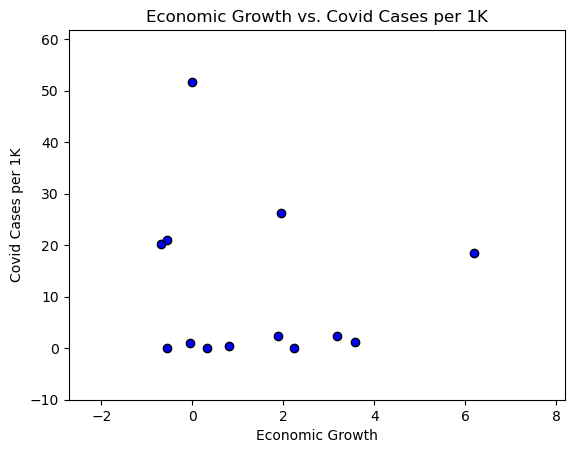

In [13]:
# scatter plot for Top Economic Growth vs. Covid cases per 1K
plt.scatter(top_gdp_df["Econ growth 2020"], top_gdp_df["CasesPer1k"], marker="o", edgecolor="black",color="blue")

# Incorporate the other graph properties
plt.title("Economic Growth vs. Covid Cases per 1K")
plt.xlabel("Economic Growth")
plt.ylabel("Covid Cases per 1K")
plt.xlim(min(top_gdp_df["Econ growth 2020"])-2, max(top_gdp_df["Econ growth 2020"])+2)
plt.ylim(min(top_gdp_df["CasesPer1k"])-10, max(top_gdp_df["CasesPer1k"])+10)


# Show plot
plt.show()

Linear Regression on Economic Growth vs Covid numbers for Top performers

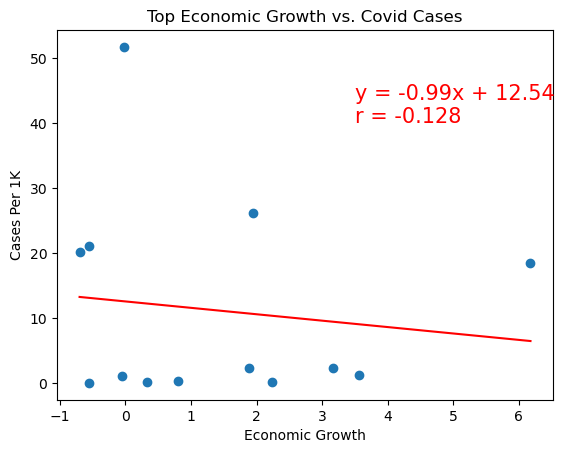

In [14]:
# Linear regression on Top performers with covid cases

valid_top_df = top_gdp_df[np.isfinite(top_gdp_df['Econ growth 2020']) & np.isfinite(top_gdp_df['CasesPer1k'])]
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = valid_top_df["Econ growth 2020"]
y_values = valid_top_df["CasesPer1k"]
xlabel = "Economic Growth"
ylabel = "Cases Per 1K"
title = "Top Economic Growth vs. Covid Cases"
text_coordinates = (3.5, 40)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


With a R value of 0.128, the linear regression clearly shows there is no correlation between Top economic growth & covid cases

Linear Regression- Top Economic Growth vs Covid Deaths

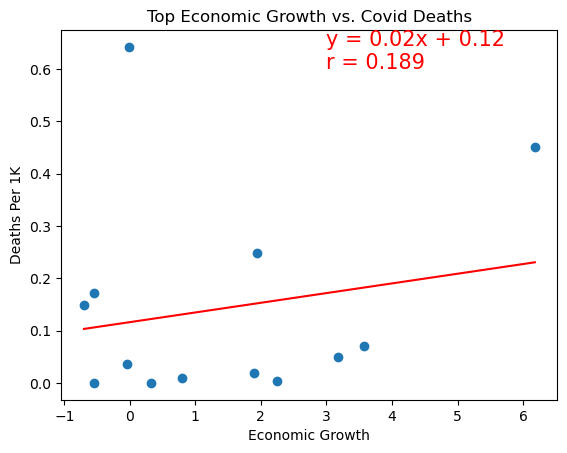

In [15]:
# Linear regression on Top performers with covid cases
valid_top_df = top_gdp_df[np.isfinite(top_gdp_df['Econ growth 2020']) & np.isfinite(top_gdp_df['DeathsPer1k'])]
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = valid_top_df["Econ growth 2020"]
y_values = valid_top_df["DeathsPer1k"]
xlabel = "Economic Growth"
ylabel = "Deaths Per 1K"
title = "Top Economic Growth vs. Covid Deaths"
text_coordinates = (3, 0.6)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


With a R value of 0.189, the linear regression clearly shows there is no correlation between Top economic growth & covid Deaths

Linear Regression- Bottom Economic Growth vs Covid cases

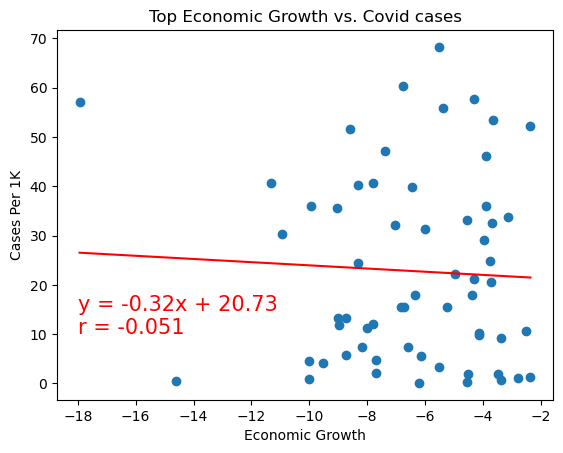

In [16]:
# Linear regression on Top performers with covid cases
valid_bottom_df = bottom_gdp_df[np.isfinite(bottom_gdp_df['Econ growth 2020']) & np.isfinite(bottom_gdp_df['CasesPer1k'])]
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = valid_bottom_df["Econ growth 2020"]
y_values = valid_bottom_df["CasesPer1k"]
xlabel = "Economic Growth"
ylabel = "Cases Per 1K"
title = "Top Economic Growth vs. Covid cases"
text_coordinates = (-18, 10)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


With a R value of 0.242, the linear regression clearly shows there is no correlation between Poor economic growth & covid Cases

Linear Regression- Bottom Economic Growth vs Covid Deaths

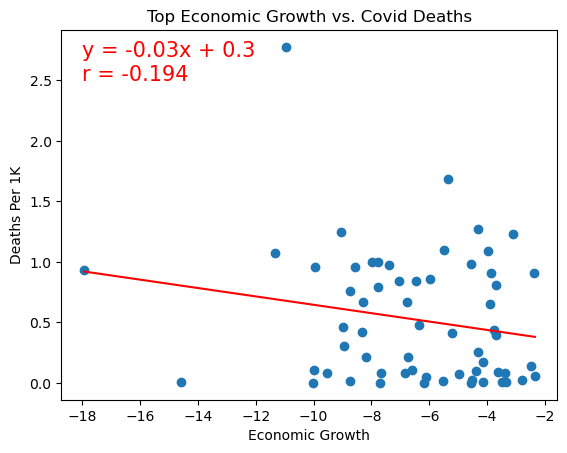

In [17]:
# Linear regression on Top performers with covid cases
valid_bottom_df = bottom_gdp_df[np.isfinite(bottom_gdp_df['Econ growth 2020']) & np.isfinite(bottom_gdp_df['DeathsPer1k'])]
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = valid_bottom_df["Econ growth 2020"]
y_values = valid_bottom_df["DeathsPer1k"]
xlabel = "Economic Growth"
ylabel = "Deaths Per 1K"
title = "Top Economic Growth vs. Covid Deaths"
text_coordinates = (-18, 2.5)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


The R value and linear Regression of all four plots show that there is no correlation between covid cases and deaths with the economic performance of these countries. Now lets move on to critical economic indicators which could have impacted the economic performance.

# Top Economic growth vs export as percentage of GDP

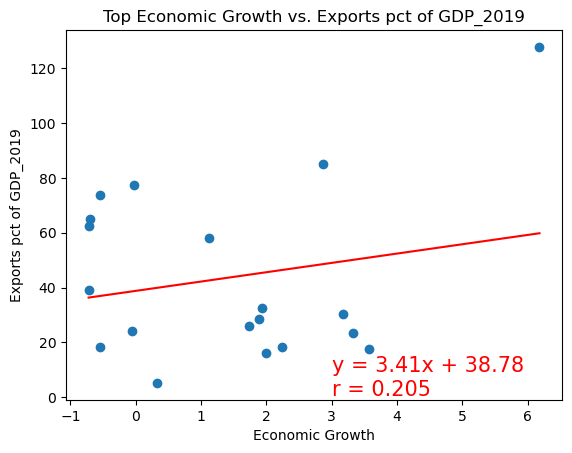

In [18]:
# Linear regression on Top performers with covid cases
valid_top_df = top_gdp_df[np.isfinite(top_gdp_df['Econ growth 2020']) & np.isfinite(top_gdp_df['Exports pct of GDP_2019'])]
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = valid_top_df["Econ growth 2020"]
y_values = valid_top_df["Exports pct of GDP_2019"]
xlabel = "Economic Growth"
ylabel = "Exports pct of GDP_2019"
title = "Top Economic Growth vs. Exports pct of GDP_2019"
text_coordinates = (3, 0.6)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


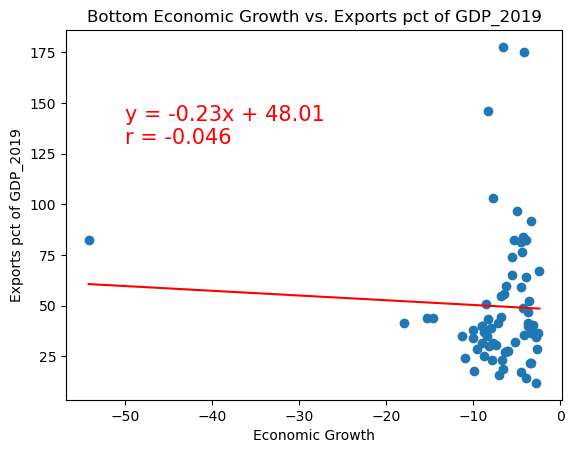

In [19]:
# Linear regression on Top performers with covid cases
valid_bottom_df = bottom_gdp_df[np.isfinite(bottom_gdp_df['Econ growth 2020']) & np.isfinite(bottom_gdp_df['Exports pct of GDP_2019'])]
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = valid_bottom_df["Econ growth 2020"]
y_values = valid_bottom_df["Exports pct of GDP_2019"]
xlabel = "Economic Growth"
ylabel = "Exports pct of GDP_2019"
title = "Bottom Economic Growth vs. Exports pct of GDP_2019"
text_coordinates = (-50, 130)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


The R values for both Top and Bottom Economic performers compared with Percentage of Exports in GDP shows ther are not correlated

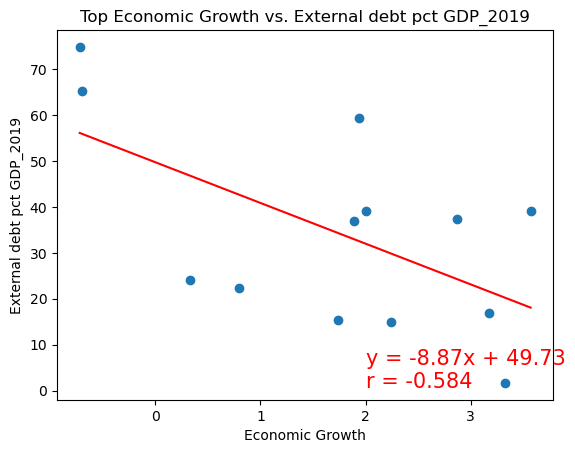

In [20]:
# Linear regression on Top performers with covid cases
valid_top_df = top_gdp_df[np.isfinite(top_gdp_df['Econ growth 2020']) & np.isfinite(top_gdp_df['External debt pct GDP_2019'])]
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = valid_top_df["Econ growth 2020"]
y_values = valid_top_df["External debt pct GDP_2019"]
xlabel = "Economic Growth"
ylabel = "External debt pct GDP_2019"
title = "Top Economic Growth vs. External debt pct GDP_2019"
text_coordinates = (2, 0.6)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


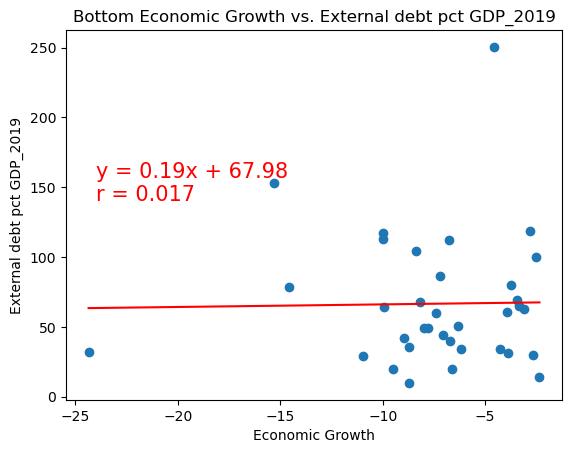

In [21]:
# Linear regression on Top performers with covid cases
valid_bottom_df = bottom_gdp_df[np.isfinite(bottom_gdp_df['Econ growth 2020']) & np.isfinite(bottom_gdp_df['External debt pct GDP_2019'])]
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = valid_bottom_df["Econ growth 2020"]
y_values = valid_bottom_df["External debt pct GDP_2019"]
xlabel = "Economic Growth"
ylabel = "External debt pct GDP_2019"
title = "Bottom Economic Growth vs. External debt pct GDP_2019"
text_coordinates = (-24, 140)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


The R values for both Top and Bottom Economic performers compared with External Debt as a percentage of GDP shows ther are not correlated

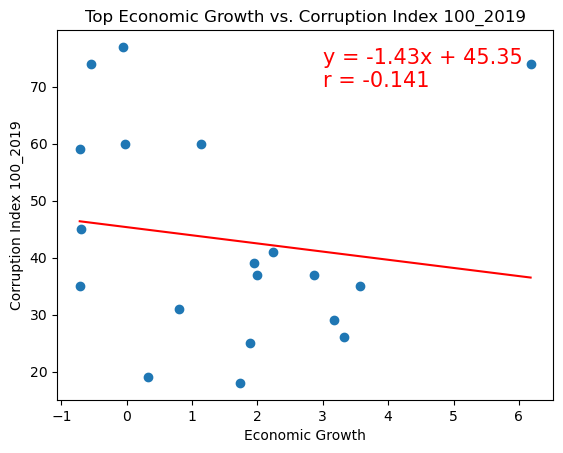

In [22]:
# Linear regression on Top performers with covid cases
valid_top_df = top_gdp_df[np.isfinite(top_gdp_df['Econ growth 2020']) & np.isfinite(top_gdp_df['Corruption Index 100_2019'])]
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = valid_top_df["Econ growth 2020"]
y_values = valid_top_df["Corruption Index 100_2019"]
xlabel = "Economic Growth"
ylabel = "Corruption Index 100_2019"
title = "Top Economic Growth vs. Corruption Index 100_2019"
text_coordinates = (3, 70)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


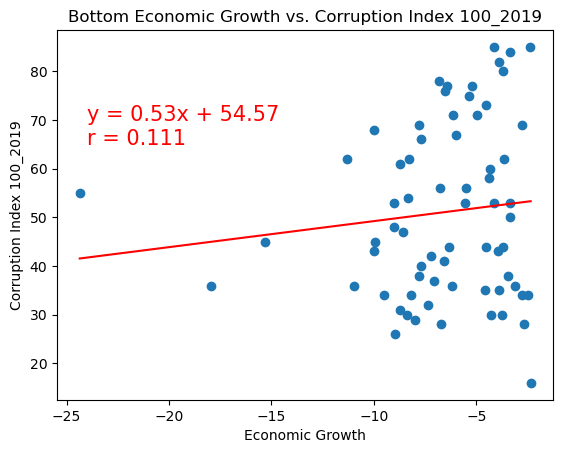

In [23]:
# Linear regression on Top performers with covid cases
valid_bottom_df = bottom_gdp_df[np.isfinite(bottom_gdp_df['Econ growth 2020']) & np.isfinite(bottom_gdp_df['Corruption Index 100_2019'])]
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = valid_bottom_df["Econ growth 2020"]
y_values = valid_bottom_df["Corruption Index 100_2019"]
xlabel = "Economic Growth"
ylabel = "Corruption Index 100_2019"
title = "Bottom Economic Growth vs. Corruption Index 100_2019"
text_coordinates = (-24, 65)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


The R values for both Top and Bottom Economic performers against the Corruption Index shows ther are not correlated

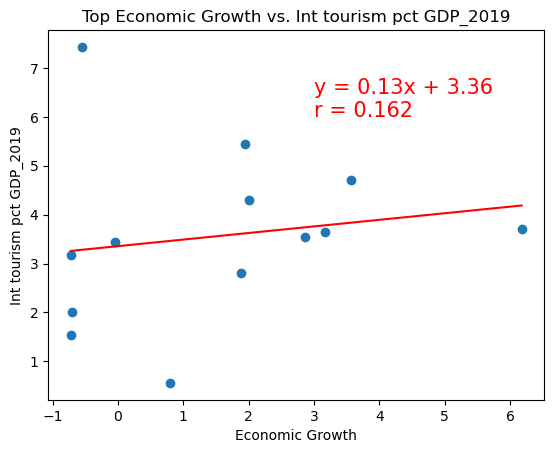

In [24]:
# Linear regression on Top performers with covid cases
valid_top_df = top_gdp_df[np.isfinite(top_gdp_df['Econ growth 2020']) & np.isfinite(top_gdp_df['Int tourism pct GDP_2019'])]
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = valid_top_df["Econ growth 2020"]
y_values = valid_top_df["Int tourism pct GDP_2019"]
xlabel = "Economic Growth"
ylabel = "Int tourism pct GDP_2019"
title = "Top Economic Growth vs. Int tourism pct GDP_2019"
text_coordinates = (3, 6)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


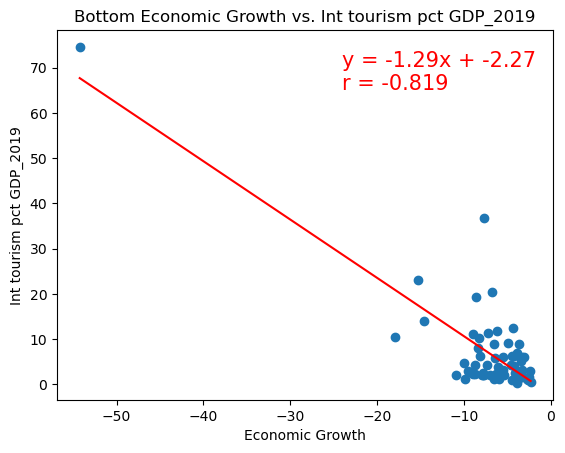

In [25]:
# Linear regression on Top performers with covid cases
valid_bottom_df = bottom_gdp_df[np.isfinite(bottom_gdp_df['Econ growth 2020']) & np.isfinite(bottom_gdp_df['Int tourism pct GDP_2019'])]
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = valid_bottom_df["Econ growth 2020"]
y_values = valid_bottom_df["Int tourism pct GDP_2019"]
xlabel = "Economic Growth"
ylabel = "Int tourism pct GDP_2019"
title = "Bottom Economic Growth vs. Int tourism pct GDP_2019"
text_coordinates = (-24, 65)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


Top Economic performers economic growth is not correlated to the percent of Int Tourism in GDP. However the R value of 0.943 (closer to 1) and the linear regression shows that the bottom Economic Growth performance was correlated to the percentage of Int Tourism on GDP. These Economies which were heavily dependant on int Tourism as part of their Economies in 2019 suffered the most in their Economic performane in 2020. 

In conclusion this analysis proves that the negative impact of Covid on certain economies was more than others due to their heavy dependance of Internation Tourism as part of their GDP. 

We can test this analysis even further by changing the bottom performers to 100 and you would still see a high R value and correlation between poor Economic growth and Int Tourism as percentage of GDP.